# Testing clustering based on the MFPT

Author: ernesto.suarez.a [at] gmail.com

In [1]:
import sys
sys.path.append("/home/esuarez/Dropbox/workspace/NMpathAnalysis/nmpath")
from tools_for_notebook import *
%matplotlib inline
from auxfunctions import *
from mfpt import *
from mappers import rectilinear_mapper
from clustering import *
#from nmpath.mappers import voronoi_mapper

## Toy model with two basins
In this model there is a (12x12)=144 grid of initial clusters, each of them with a single element, we are going to cluster them and reperesent the clusters with more than one element.

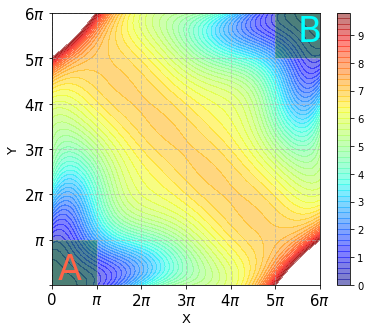

In [2]:
plot_traj([],[],figsize=(6,5))

## Generating MC trajectory

### Continuos Ensemble

In [4]:
# This is just a Monte Carlo simulation on that energy surface
mc_traj = mc_simulation2D(500000)

my_ensemble = Ensemble([mc_traj])

### Discrete Ensemble and Transition Matrix

The mapping funcion divides each dimension in 12. The total number of bins is 144.

In [5]:
discrete_ens = DiscreteEnsemble.from_ensemble(my_ensemble, mapping_function2D)

# Transition Matrix
K = discrete_ens._mle_transition_matrix(N*N,prior_counts=1e-6)

## Agglomerative Clustering

The points with the same color belong to the same cluster, only the clusters with size > 1 are shown.

t_cut: 100.00tau, t_min: 100.16tau, t_max: 6.94e+09tau, tAB: 0.00tau


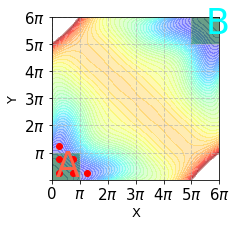

t_cut: 545.45tau, t_min: 607.87tau, t_max: 6.94e+09tau, tAB: 5548.01tau


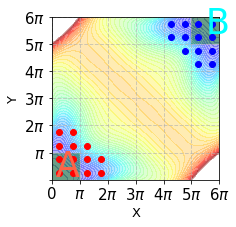

t_cut: 990.91tau, t_min: 1057.01tau, t_max: 6.94e+09tau, tAB: 5387.10tau


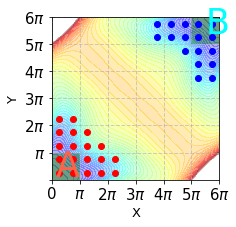

t_cut: 1436.36tau, t_min: 1454.12tau, t_max: 6.94e+09tau, tAB: 5370.99tau


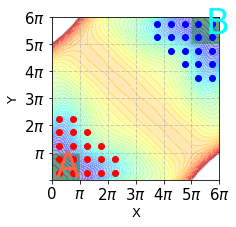

t_cut: 1881.82tau, t_min: 2111.07tau, t_max: 6.94e+09tau, tAB: 5076.68tau


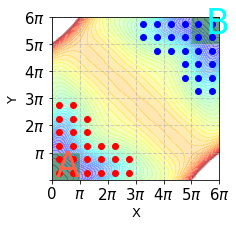

t_cut: 2327.27tau, t_min: 2500.30tau, t_max: 6.94e+09tau, tAB: 5058.91tau


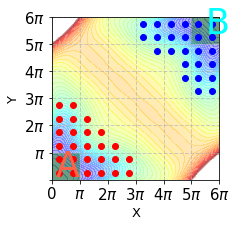

t_cut: 2772.73tau, t_min: 2831.07tau, t_max: 6.94e+09tau, tAB: 4892.08tau


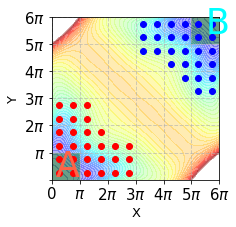

t_cut: 3218.18tau, t_min: 3304.20tau, t_max: 6.94e+09tau, tAB: 4635.05tau


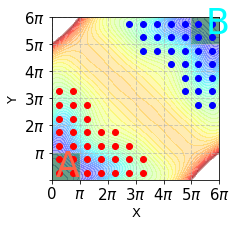

t_cut: 3663.64tau, t_min: 3766.32tau, t_max: 6.94e+09tau, tAB: 4587.95tau


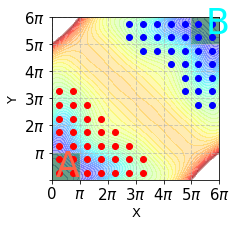

t_cut: 4109.09tau, t_min: 4249.38tau, t_max: 6.94e+09tau, tAB: 4249.38tau


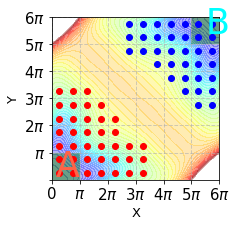

t_cut: 4554.55tau, t_min: 4658.50tau, t_max: 6.94e+09tau, tAB: 0.00tau


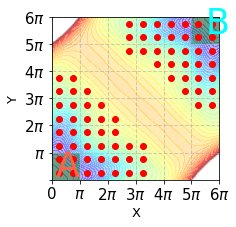

t_cut: 5000.00tau, t_min: 5154.46tau, t_max: 6.94e+09tau, tAB: 0.00tau


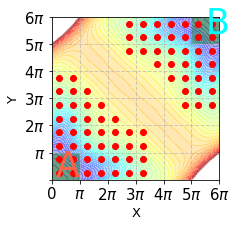

In [15]:
t_min_list=[]
t_max_list=[]
t_AB_list=[]
#n_clusters = [135, 130, 125, 120, 115, 110, 105, 100, 95, 90, 85, 80, 75, 70]
t_cut_list = np.linspace(100,5000,12)

for t_cut in t_cut_list:
    big_clusters=[]
    big_clusters_index =[]
    clusters, t_min, t_max, clustered_tmatrix = kinetic_clustering_from_tmatrix(K, verbose=False, t_cut=t_cut)
    t_min_list.append(t_min)
    t_max_list.append(t_max)
    
    for i, cluster in enumerate(clusters):
        if len(cluster) > 1:
            big_clusters.append(cluster)
            big_clusters_index.append(i)
            
    n_big = len(big_clusters)
    
    if n_big > 1:
        # Since I know there is only two big clusters I can do this,
        # in general I have to do a better job
        tAB = markov_commute_time(clustered_tmatrix,[big_clusters_index[0]],[big_clusters_index[1]] )
    else:
        tAB = 0.0
    t_AB_list.append(tAB)
    
    discrete = [True for i in range(n_big)]
    
    print("t_cut: {:.2f}tau, t_min: {:.2f}tau, t_max: {:.2e}tau, tAB: {:.2f}tau".format(t_cut, t_min, t_max, tAB))
    plot_traj([ [big_clusters[i],[]] for i in range(n_big) ], 
              discrete, std = 0.00002, alpha=0.3, justpoints=True, figsize=(3,3))

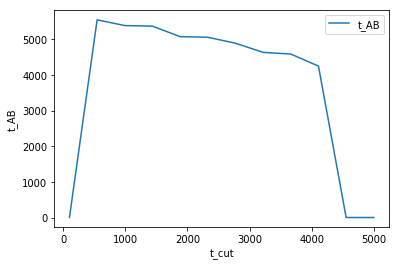

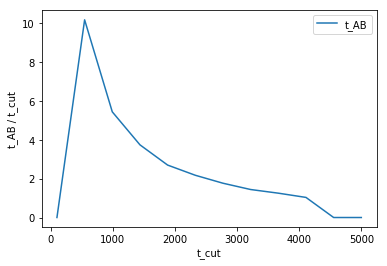

In [16]:
plt.plot(t_cut_list, t_AB_list, label="t_AB")
plt.xlabel('t_cut')
plt.ylabel('t_AB')
plt.legend()
plt.show()

plt.plot(t_cut_list, t_AB_list/t_cut_list, label="t_AB")
plt.xlabel('t_cut')
plt.ylabel('t_AB / t_cut')
plt.legend()
plt.show()